In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage
from scipy.fft import fft, ifft
from scipy.optimize import line_search
from tensorflow.python import tf2
from keras.datasets import mnist
from scipy.linalg import convolution_matrix
from PIL import Image, ImageOps
import time
import colorsys

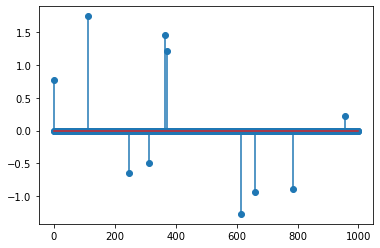

In [2]:
#Initializations
features = 200;
samples = 1000;
A = np.random.randn(features,samples)
#Try different matrices
#y = np.random.randn(features)
#Initialize some random sparse solution
x0 = np.zeros((samples,1))
p = np.random.permutation(samples)
x0[p[:10]] = np.random.randn(10,1)
x0 = np.reshape(x0,-1)
y = A@x0
lam = .9 * np.max( np.abs(A.T @ y))
plt.stem(x0)
plt.show()

In [53]:
b

10000

In [3]:
def Hessianinv_uu(A,v,it):
    n = np.size(v)
    Dv = np.diag(v)
    Hyy = (np.eye(samples) + (1/lam)*(Dv @ ((A.T @ A) @ Dv)))
    Lg = np.linalg.norm(Hyy,2)
    Hyy = Hyy/Lg
    Hinv = np.eye(samples)
    HyyPow = np.eye(samples)-Hyy
    for i in range(it):
        Hinv = Hinv + HyyPow
        HyyPow = HyyPow @ (np.eye(samples) - Hyy)
    return (Hinv/(Lg))

Error is  3.831013195603295e-15
Relative error is  3.831013195603294e-15


In [51]:
p = np.random.randint(1,999)
p

375

In [14]:
def Hessianinv_uu_stc(A,v,b):
    m = np.size(A,0)
    n = np.size(A,1)
    p = np.random.randint(1,b-1)
    Dv = np.diag(v)
    Hyy = np.eye(n) + (1/lam)*(Dv @ ((A.T @ A) @ Dv))
    Lg = np.linalg.norm(Hyy,2)
    #Hlist = np.zeros((m,n,p))
    #for i in range(p):
    #    Ast = np.random.randn(features,samples)
    #    Hlist[:,:,i] = np.eye(samples) + (1/lam)*(Dv @ ((Ast.T @ Ast) @ Dv))
    
    Hinv = b*np.eye(n)/Lg
    if (p == 1):
        return Hinv
    
    
    for i in range(p):
        Ast = np.random.randn(m,n)
        #Ast = np.random.randn(n)
        Hst = np.eye(n) + (1/lam)*(Dv @ ((Ast.T @ Ast) @ Dv))
        #Hst = np.eye(n) + (1/lam)*(Dv @ ((np.outer(Ast,Ast)) @ Dv))
        Hinv = Hinv @ (np.eye(n) - (1/Lg)*Hst)
            
    return Hinv

In [13]:
iters = 100
b = 1000
u = np.random.rand(samples)
v = np.random.rand(samples)
Hinv = np.linalg.inv(np.eye(samples) + (1/lam)*(np.diag(v) @ ((A.T @ A) @ np.diag(v))))
Hinv_calc = Hessianinv_uu(A,v,iters)
Hinv_calc_st = Hessianinv_uu_stc(A,v,b)
err = np.linalg.norm(Hinv-Hinv_calc,2)
rel_err = err / np.linalg.norm(Hinv_calc,2)
err_st = np.linalg.norm(Hinv-Hinv_calc_st,2)
rel_err_st = err_st / np.linalg.norm(Hinv_calc_st,2)
print('Comparing normal inverse calculation and formula:')
print('Error is ', err)
print('Relative error is ', rel_err)
print('Comparing normal inverse calculation and stochastic:')
print('Error is ', err_st)
print('Relative error is ', rel_err_st)

Comparing normal inverse calculation and formula:
Error is  3.2218664708719586e-15
Relative error is  3.2218664708719543e-15
Comparing normal inverse calculation and stochastic:
Error is  1.000000000000002
Relative error is  3.379171595166783e+122


In [54]:
np.linalg.norm(Hinv_calc_st,2)

5.63e-322

In [6]:
Ast = np.random.randn(5)

In [11]:
np.outer(Ast,Ast)

array([[ 1.92302881, -2.24091976, -3.08726181, -1.2418647 , -0.90348586],
       [-2.24091976,  2.61136044,  3.59760912,  1.44715416,  1.05283878],
       [-3.08726181,  3.59760912,  4.95634044,  1.99370984,  1.45047092],
       [-1.2418647 ,  1.44715416,  1.99370984,  0.80197859,  0.58345834],
       [-0.90348586,  1.05283878,  1.45047092,  0.58345834,  0.4244797 ]])